In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 1000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(45000, 3) (45000, 3) (7949, 3) (7949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.615973 , 0.615452 , 0.0603018],
       [0.607584 , 0.616838 , 0.0577194],
       [0.599019 , 0.618318 , 0.0552926]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
#cost = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(output_layer , y_true))))
#cost = tf.reduce_mean(tf.square(tf.subtract(output_layer, y_true)))
#cost = tf.reduce_mean(output_layer)
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(45000, 3) dtype=float32>

In [32]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(cost)

In [33]:
session.run(tf.global_variables_initializer())

In [34]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [35]:
print (y_true.shape)

(?, 3)


In [36]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:y_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]

In [37]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [38]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.4791801
[2]
Train Accuracy :  0.41864762
[3]
Train Accuracy :  0.37272426
[4]
Train Accuracy :  0.34478965
[5]
Train Accuracy :  0.33557367
[6]
Train Accuracy :  0.33859465
[7]
Train Accuracy :  0.34352678
[8]
Train Accuracy :  0.34378958
[9]
Train Accuracy :  0.33772606
[10]
Train Accuracy :  0.32659185
[11]
Train Accuracy :  0.31265214
[12]
Train Accuracy :  0.29790395
[13]
Train Accuracy :  0.28380346
[14]
Train Accuracy :  0.27132374
[15]
Train Accuracy :  0.26080787
[16]
Train Accuracy :  0.2517006
[17]
Train Accuracy :  0.24291644
[18]
Train Accuracy :  0.2339922
[19]
Train Accuracy :  0.22546875
[20]
Train Accuracy :  0.21830313
[21]
Train Accuracy :  0.21266028
[22]
Train Accuracy :  0.20748466
[23]
Train Accuracy :  0.20152524
[24]
Train Accuracy :  0.19480291
[25]
Train Accuracy :  0.18792269
[26]
Train Accuracy :  0.1805751
[27]
Train Accuracy :  0.17190865
[28]
Train Accuracy :  0.1621317
[29]
Train Accuracy :  0.15290171
[30]
Train Accuracy :  0.145

[236]
Train Accuracy :  0.017464021
[237]
Train Accuracy :  0.011724303
[238]
Train Accuracy :  0.012710034
[239]
Train Accuracy :  0.015581382
[240]
Train Accuracy :  0.0042337063
[241]
Train Accuracy :  0.025110379
[242]
Train Accuracy :  0.027136564
[243]
Train Accuracy :  0.008478356
[244]
Train Accuracy :  0.02673488
[245]
Train Accuracy :  0.034582663
[246]
Train Accuracy :  0.023900189
[247]
Train Accuracy :  0.015432539
[248]
Train Accuracy :  0.020155095
[249]
Train Accuracy :  0.02230031
[250]
Train Accuracy :  0.018292192
[251]
Train Accuracy :  0.009944914
[252]
Train Accuracy :  0.0195219
[253]
Train Accuracy :  0.014927091
[254]
Train Accuracy :  0.012418806
[255]
Train Accuracy :  0.014705592
[256]
Train Accuracy :  0.007344866
[257]
Train Accuracy :  0.0094123855
[258]
Train Accuracy :  0.008468049
[259]
Train Accuracy :  0.009277669
[260]
Train Accuracy :  0.0062818956
[261]
Train Accuracy :  0.01511616
[262]
Train Accuracy :  0.015181194
[263]
Train Accuracy :  0.0070

[464]
Train Accuracy :  0.0076420954
[465]
Train Accuracy :  0.010336551
[466]
Train Accuracy :  0.009384045
[467]
Train Accuracy :  0.008545526
[468]
Train Accuracy :  0.007542181
[469]
Train Accuracy :  0.010346968
[470]
Train Accuracy :  0.009408174
[471]
Train Accuracy :  0.008418564
[472]
Train Accuracy :  0.007417267
[473]
Train Accuracy :  0.010384176
[474]
Train Accuracy :  0.0094636055
[475]
Train Accuracy :  0.008256289
[476]
Train Accuracy :  0.007252529
[477]
Train Accuracy :  0.010468048
[478]
Train Accuracy :  0.009573546
[479]
Train Accuracy :  0.0080299415
[480]
Train Accuracy :  0.0070144455
[481]
Train Accuracy :  0.010636974
[482]
Train Accuracy :  0.0097805215
[483]
Train Accuracy :  0.0076942993
[484]
Train Accuracy :  0.006655508
[485]
Train Accuracy :  0.01093885
[486]
Train Accuracy :  0.010131947
[487]
Train Accuracy :  0.0072016553
[488]
Train Accuracy :  0.006125271
[489]
Train Accuracy :  0.011426198
[490]
Train Accuracy :  0.010679922
[491]
Train Accuracy :

[692]
Train Accuracy :  0.0072848736
[693]
Train Accuracy :  0.0035161753
[694]
Train Accuracy :  0.013849091
[695]
Train Accuracy :  0.01355659
[696]
Train Accuracy :  0.0029097684
[697]
Train Accuracy :  0.0060866885
[698]
Train Accuracy :  0.0039591896
[699]
Train Accuracy :  0.006103545
[700]
Train Accuracy :  0.0033460762
[701]
Train Accuracy :  0.0039682803
[702]
Train Accuracy :  0.0072848755
[703]
Train Accuracy :  0.0032272937
[704]
Train Accuracy :  0.009763337
[705]
Train Accuracy :  0.0074757375
[706]
Train Accuracy :  0.008668536
[707]
Train Accuracy :  0.008312012
[708]
Train Accuracy :  0.0064146454
[709]
Train Accuracy :  0.0070246058
[710]
Train Accuracy :  0.0050795395
[711]
Train Accuracy :  0.006465457
[712]
Train Accuracy :  0.0042277602
[713]
Train Accuracy :  0.005905795
[714]
Train Accuracy :  0.00525267
[715]
Train Accuracy :  0.0038193238
[716]
Train Accuracy :  0.0062360084
[717]
Train Accuracy :  0.004202211
[718]
Train Accuracy :  0.0066396073
[719]
Train A

[920]
Train Accuracy :  0.007475295
[921]
Train Accuracy :  0.0056439373
[922]
Train Accuracy :  0.004948488
[923]
Train Accuracy :  0.008147212
[924]
Train Accuracy :  0.0074559073
[925]
Train Accuracy :  0.0056215096
[926]
Train Accuracy :  0.004928157
[927]
Train Accuracy :  0.008125452
[928]
Train Accuracy :  0.007436613
[929]
Train Accuracy :  0.0055987244
[930]
Train Accuracy :  0.0049066986
[931]
Train Accuracy :  0.008107124
[932]
Train Accuracy :  0.0074208053
[933]
Train Accuracy :  0.0055732788
[934]
Train Accuracy :  0.004883511
[935]
Train Accuracy :  0.00808939
[936]
Train Accuracy :  0.007405105
[937]
Train Accuracy :  0.005549257
[938]
Train Accuracy :  0.0048622945
[939]
Train Accuracy :  0.008070399
[940]
Train Accuracy :  0.0073876097
[941]
Train Accuracy :  0.005528426
[942]
Train Accuracy :  0.004846928
[943]
Train Accuracy :  0.008042916
[944]
Train Accuracy :  0.007356238
[945]
Train Accuracy :  0.0055251583
[946]
Train Accuracy :  0.0048596514
[947]
Train Accura

<tf.Tensor 'dense_3/BiasAdd:0' shape=(45000, 3) dtype=float32>

In [39]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [40]:
#print (session.run(output_layer))

In [41]:
#print (session.run(cost))

In [42]:
#print (rmse_a)

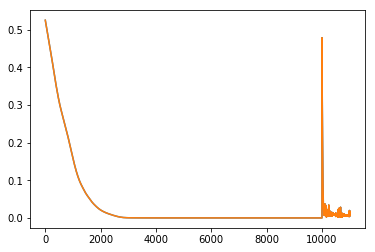

In [43]:
plt.plot(list(enumerate(range(len(rmse_a)),1)),rmse_a)

In [44]:
list(enumerate(rmse_a[2:11],1))

[(1, 0.524697),
 (2, 0.5242485),
 (3, 0.52380157),
 (4, 0.52335435),
 (5, 0.52290726),
 (6, 0.5224605),
 (7, 0.5220147),
 (8, 0.5215684),
 (9, 0.5211218)]

In [45]:
print (rmse_a[-1])

0.011352296
